# SME0829 Aprendizado de Máquina


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Máquinas de suporte vetorial

### Classificação nos dados iris



In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Dados iris
iris = datasets.load_iris()

X = iris.data[:, :2]  # Usaremos apenas duas características para visualização
y = iris.target

# Separação da base de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X,  y, test_size=0.3, random_state=42)

# Função para plotar as regiões de decisão
def plot_decision_regions(X, y, classifier):
    h = 0.02  # Tamanho do passo na grade
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision regions')


In [59]:
# SVM com kernel linear
svm_linear = svm.SVC(kernel='linear')

# Treinamento do modelo
svm_linear.fit(X_train, y_train)

# Previsão com a base de teste
y_pred_linear = svm_linear.predict(X_test)


Text(0.5, 1.0, 'SVM - Linear Kernel (Teste)')

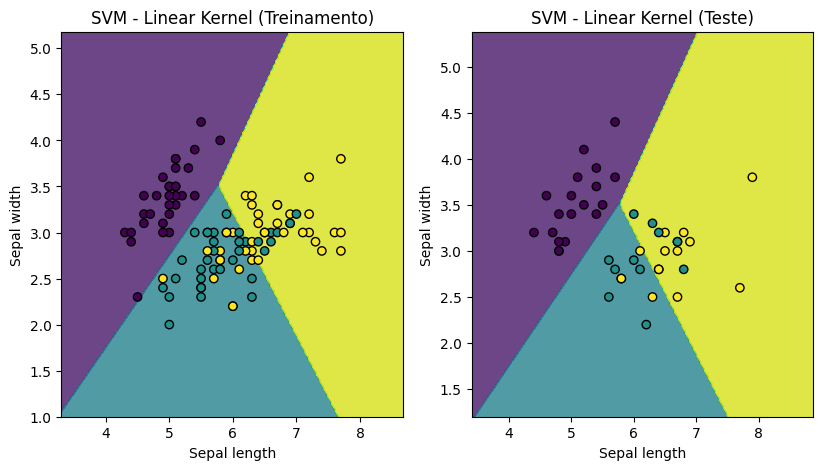

In [60]:
# SVM com kernel linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, svm_linear)
plt.title('SVM - Linear Kernel (Treinamento)')

plt.subplot(132)
plot_decision_regions(X_test, y_test, svm_linear)
plt.title('SVM - Linear Kernel (Teste)')


In [61]:
# Cálculo da acurácia do classificador linear

acc = accuracy_score(y_test, y_pred_linear)

print("\nAcurácia do classificador linear:", np.round(acc,3))



Acurácia do classificador linear: 0.8


In [62]:
# Classificador SVM com kernel polinomial
clf_poly = svm.SVC(kernel='poly', degree=3)

# Treinamento do modelo
clf_poly.fit(X_train, y_train)

# Previsão com a base de teste
y_pred_poly = clf_poly.predict(X_test)

# Acurácia com kernel polinomial
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print("Acurácia com kernel polinomial:", accuracy_poly)


Acurácia com kernel polinomial: 0.7333333333333333


Text(0.5, 1.0, 'SVM - Polynomial Kernel (Teste)')

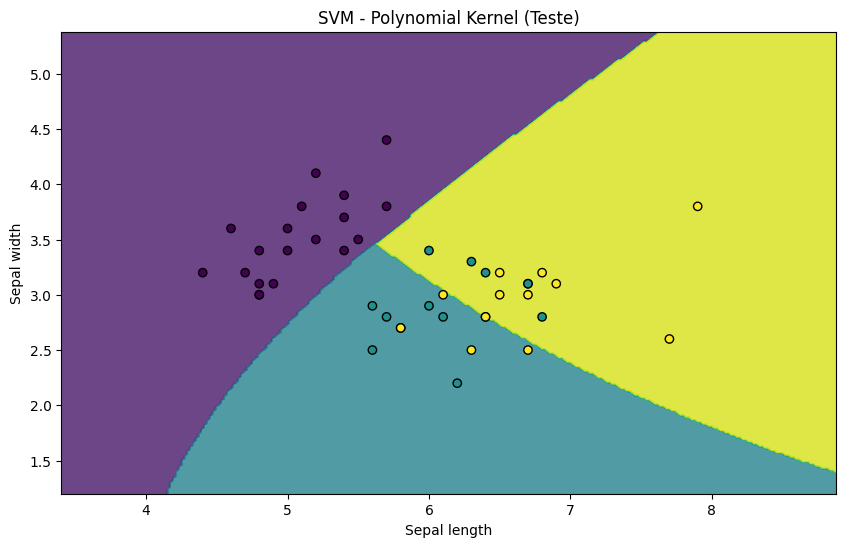

In [63]:
# SVM com kernel polinomial
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

plt.figure(figsize=(10, 6))

plot_decision_regions(X_test, y_test, svm_poly)
plt.title('SVM - Polynomial Kernel (Teste)')


In [64]:
# SVM com kernel RBF (radial basis function - função de base radial)
svm_rbf = svm.SVC(kernel='rbf')

# Train the classifier using the training data
svm_rbf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred_rbf = clf_rbf.predict(X_test)

# Acurácia com kernel RBF
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print("Acurácia com kernel RBF:", accuracy_rbf)

Acurácia com kernel RBF: 0.8


Text(0.5, 1.0, 'SVM - RBF Kernel (Teste)')

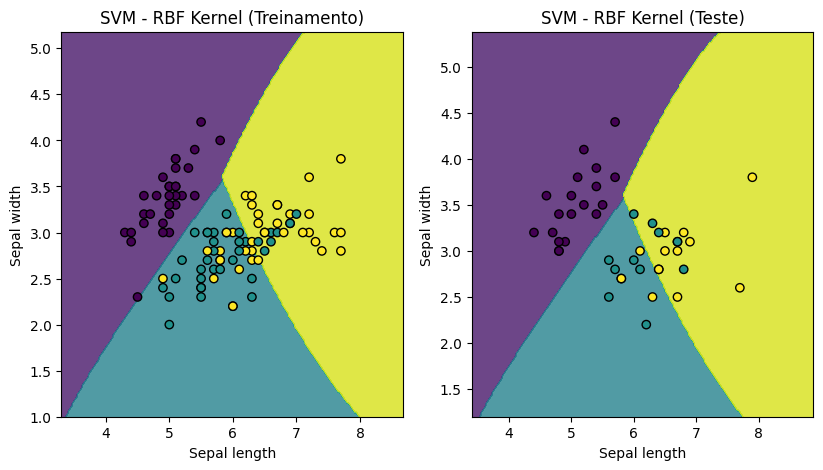

In [65]:

plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, svm_rbf)
plt.title('SVM - RBF Kernel (Treinamento)')


plt.subplot(132)
plot_decision_regions(X_test, y_test, svm_rbf)
plt.title('SVM - RBF Kernel (Teste)')

### Exercício: Repita considerando as 4 preditoras